In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

<h1> Simple Linear Regression </h1>

Linear approach to modelling the relationship between a response variable and one or more explanatory variables.

In Simple Linear Regression we have one explanatory variable (e.g. using height to predict weight).

Our aim is to find a linear function which predicts the response variable as a function of the explanatory variables.

To do so we make use of something called the ordinary least squares method (OLS). Essentially the accuracy of each prediction is measures by its squared residual (residual being the vertical distance between the fitted line and the true data point). With our goal to be minimising the sum of the squared residuals (SSR).

Function for a linear regression model:

$$ y=\alpha +\beta x $$

However, we have errors in this as the general relationship may not hold exaclty for the entire population of values of x (explanatory) and y (response). Essentially we cannot model any random process perfectly so we must account for this in our model.

so we use the function:

$$  y_i = \alpha + \beta x_i + \varepsilon_i $$

This is a linear regression model.

The crux of this problem is given n data pairs (x_i, y_i) how can we estimate alpha and beta.

This is where the error term comes in, the formula for the error term of any data pair is:

$$ {\displaystyle {\widehat {\varepsilon }}_{i}=y_{i}-\alpha -\beta x_{i}.} $$ 

(hat means an estimation)

Therefore the sum of squared residuals and our problem end up being:

$$ {\displaystyle {\text{Find }}\min _{\alpha ,\,\beta }Q(\alpha ,\beta ),\quad {\text{for }}Q(\alpha ,\beta )=\sum _{i=1}^{n}{\widehat {\varepsilon }}_{i}^{\,2}=\sum _{i=1}^{n}(y_{i}-\alpha -\beta x_{i})^{2}\ .}$$

<h3>There are 2 ways to get an estimate of alpha and beta. The first is with an analytical approach and the second in with an iterative approach. We go over the analytic approach first</h3>

With some rearranging we get:

$${\textstyle {\begin{aligned}{\widehat {\alpha }}&={\bar {y}}-({\widehat {\beta }}\,{\bar {x}}),\\[5pt]{\widehat {\beta }}&={\frac {\sum _{i=1}^{n}(x_{i}-{\bar {x}})(y_{i}-{\bar {y}})}{\sum _{i=1}^{n}(x_{i}-{\bar {x}})^{2}}}\\[6pt]\end{aligned}}}$$

In [5]:
#Calculating alphahat and betahat using the analytical approach
x = np.array([1.47,1.50, 1.52, 1.55, 1.57, 1.60, 1.63, 1.65,
             1.68, 1.70, 1.73, 1.75, 1.78, 1.80, 1.83])
y = np.array([52.21, 53.12, 54.48, 55.84, 57.20, 58.57, 59.93, 61.29,
              63.11, 64.47, 66.28, 68.10, 69.92, 72.19, 74.46])

We need to solve the following equations to estimate beta and alpha hat

$${\textstyle {\begin{aligned}{\widehat {\alpha }}&={\bar {y}}-({\widehat {\beta }}\,{\bar {x}}),\\[5pt]{\widehat {\beta }}&={\frac {\sum _{i=1}^{n}(x_{i}-{\bar {x}})(y_{i}-{\bar {y}})}{\sum _{i=1}^{n}(x_{i}-{\bar {x}})^{2}}}\\[6pt]\end{aligned}}}$$

In [84]:
xbar = x.mean()
ybar = y.mean()

# beta hat
sum_numerator = 0
sum_denominator = 0

for xi, yi in zip(x, y):
    sum_numerator += (xi - xbar) * (yi - ybar)
    sum_denominator += (xi-xbar) ** 2

betahat = sum_numerator / sum_denominator

# alpha hat
alphahat = ybar - (betahat*xbar)

In [45]:
alphahat, betahat

(-39.06195591884392, 61.272186542110624)

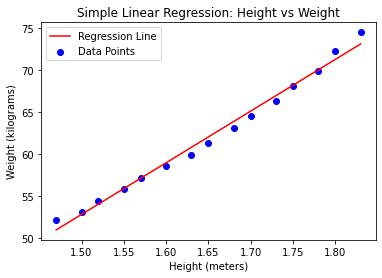

In [47]:
# Create a scatter plot of the data points
plt.scatter(x, y, color='blue', label='Data Points')

# Generate values for the regression line
x_values = np.linspace(min(x), max(x), 100)
y_values = betahat * x_values + alphahat

# Plot the regression line
plt.plot(x_values, y_values, color='red', label='Regression Line')

# Label the axes and add a title
plt.xlabel('Height (meters)')
plt.ylabel('Weight (kilograms)')
plt.title('Simple Linear Regression: Height vs Weight')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [82]:
# The iterative approach using gradient descent

alpha = 0
beta = 0

iterations = 10000
learning_rate = 0.01

for i in range(iterations):
    y_preds = alpha + beta * x
    
    # Because we are using numpy arrays the y - y_preds will operate element wise we could use for loops to 
    # do the same thing here
    d_alpha = -2 * sum(y - y_preds)
    d_beta = -2 * sum(x * (y - y_preds))
    
    #update alpha and beta
    alpha -= learning_rate * d_alpha
    beta -=learning_rate * d_beta

In [83]:
alpha, beta

(-39.06195591883993, 61.2721865421082)

In [ ]:
# Continue using the height vs weight and demo on this at the end if time allows

salary_data = pd.read_csv('/Users/moose/Documents/PyCharm_Projects/Karpathy_NN_course/Salary_dataset.csv')
salary_data.drop('Unnamed: 0', axis=1, inplace=True)
salary_data.head()